# $\frac{a}{b+c}+\frac{b}{c+a}+\frac{c}{a+b}=4$

The solution shall consist in Natural numbers, so $a,b,c \in \mathbb{N}$.
Do not try to find the solution by trying numbers, the solution is:   
a = 154476802108746166441951315019919837485664325669565431700026634898253202035277999  
b = 36875131794129999827197811565225474825492979968971970996283137471637224634055579  
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036


We use Python, Jupyter Notebooks and the Python Module Sympy. There is an English and a German version of the Jupyter notebook. 

We recommend to install Python and Jupyter through [Anaconda](https://www.anaconda.com/products/distribution) which also yields a free distribution. Sympy can be installed through `pip install sympy`. 

The solution follows an article published in [Spektrum der Wissenschaft](www.spektrum.de) 11.2022 page 73. 

It uses an elliptic curve and the construction of additional rational points through tangents at or lines through rational points and their intersection with the elliptic curve. 

### Method: 
- Multiply the equation with (a+b)(b+c)(c+a) to yield a homogenic equation of third order in a,b,c. 
- Divide this equation by $c^3$ to yield an equation in $x=a/c$ and $y=b/c$ of third order in x and y. 
- Use 2 known solutions x,y = (-4,-11) and x,y = (-11,-4) to find additional rational points on the curve.
- Use these additional points with tangents and lines through these points to find additional rational points on the curve until there is a point (x,y) with x and y both greater than 0.
- Calculate a,b,c from this x and y. 


# The problem 
as stated in Spektrum der Wissenschaft 11.22 page 73:   

We want to solve the equation $$\frac{a}{b+c}+\frac{b}{c+a}+\frac{c}{a+b}=4$$
Multiply with $(a+b)(b+c)(a+c)$ which yields

In [1]:
from sympy import *
init_printing()
a,b,c,x,y = symbols('a b c x y')

In [2]:
eq = a/(b+c)+b/(c+a)+c/(a+b)-4
eq2 = simplify(eq*(a+b)*(b+c)*(c+a))
eq2

So we have $$a^3+b^3+c^3-3(a^2b+a^2c+ab^2+ac^2+b^2c+bc^2)-5abc=0$$
Divide by $c^3$ and set $x=\frac{a}{c}$ and $y=\frac{b}{c}$ and we get the following equation which should be equal to 0:

In [3]:
x,y,dx,dy = symbols('x y dx dy')
eq = x**3+y**3+1-3*(x**2*y+x**2+x*y**2+y**2+x+y)-5*x*y
eq

In [4]:
# We know that a solution is -11,-4. Check
x1 = -11
y1 = -4
eq.subs(x,x1).subs(y,y1)

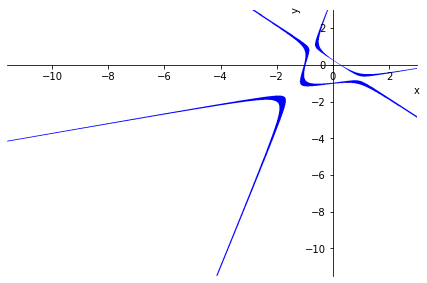

In [5]:
plt = plot_implicit(eq,('x', -11.6, 3), ('y', -11.5, 3))

### Now to get a Tangent at this point:
We differentiate by y and x.  
$d(eq)=\frac{\partial (eq)}{\partial x}dx + \frac{\partial (eq)}{\partial y}dy$

In [6]:
deq_dx = diff(eq,x)
deq_dy = diff(eq,y)
deq = deq_dx*dx+deq_dy*dy
deq

This should be 0, therefore we have for dy/dx: 

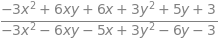

In [7]:
dy_dx = -deq_dx/deq_dy
dy_dx

For a tangent $y=mx+b$ we know the slope m at this point by substituting x and y by x1,y1.  
For b we know $b=y1-m*x1$

In [8]:
m = dy_dx.subs(x,x1).subs(y,y1)
b = y1-m*x1
m,b

In [9]:
# Find another point: 
# The tangent 
eq2 = m*x+b
# The y value of eq must also fulfil the tangent equation
eq3 = eq.subs(y,eq2)
eq3

In [10]:
# We know that x=x1 fulfils this equation (exactly twice, since it is a tangent)
q1,r1 = div(eq3,(x-x1)**2)
# The rest r1 should be 0
q1,r1

In [11]:
x2=solve(q1,x)[0]
y2 = eq2.subs(x,x2)
x2,y2

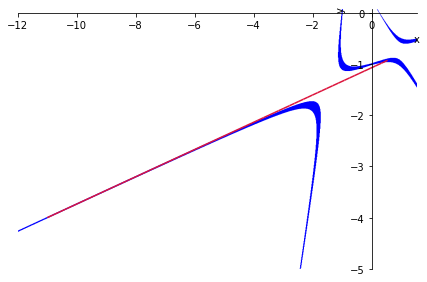

In [12]:
p1 = plot_implicit(eq,x_var=('x', x1-1, x2+1), y_var=('y', y1-1,y2+1),show=False)
p2 = plot(eq2, ('x', x1, x2),line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

**Remark**: The equation eq3 is of 3rd order. We know two solutions (either the tangent or the line through 2 points). These solutions shall have rational values for x and y. Then we can divide eq by $(x-x_1)(x-x_2)$ and yield an equation of first order whith rational coefficients which has a rational solution.   
So we move from rational to rational solution until x and y are both positive. 

This also is the reason of this construction with intersections or tangents. 


### Next Step

In [13]:
# Next step, the tangent at x2,y2
m = dy_dx.subs(x,x2).subs(y,y2)
b = y2-m*x2
m,b

In [14]:
# Find another point: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x2)**2)
q1,r1

In [15]:
[x3]=solve(q1,x)
y3 = eq2.subs(x,x3)
x3,y3

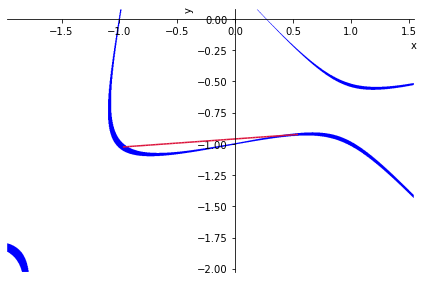

In [16]:
p1 = plot_implicit(eq,x_var=('x', x3-1, x2+1), y_var=('y', y3-1,y2+1),show=False)
p2 = plot(eq2, ('x', x3, x2), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

### Next step

In [17]:
# Tangent at (x3,y3)
m = dy_dx.subs(x,x3).subs(y,y3)
b = y3-m*x3
m,b

In [18]:
# Find another point: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x3)**2)
q1,r1

In [19]:
[x4]=solve(q1,x)
x4
y4 = eq2.subs(x,x4)
x4,y4

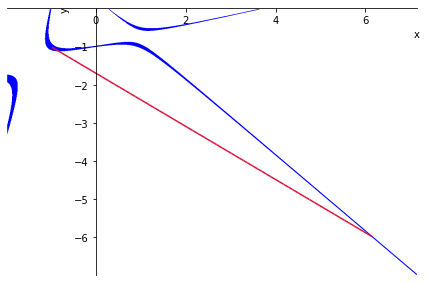

In [20]:
p1 = plot_implicit(eq,x_var=('x', x3-1, x4+1), y_var=('y', y4-1,y3+1),show=False)
p2 = plot(eq2, ('x',x3,x4), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

### Last Step
Here we do not use the tangent but take a line through 2 points (-4,-11) and (x4,y4). 

In [21]:
# check that -4,-11 is point on the curve
x5,y5=-4,-11
eq.subs(x,x5).subs(y,y5)

In [22]:
# get m not through tangent but through connection of (x4,y4)->(x5,y5)
# m is the difference in y divided by the difference in x
m = (y4-y5)/(x4-x5)
b = y5-m*x5
m,b

In [23]:
# Find another point: 
eq2 = m*x+b
eq3 = eq.subs(y,eq2)
q1,r1 = div(eq3,(x-x5)*(x-x4))
q1,r1

In [24]:
[x6]=solve(q1,x)
y6 = eq2.subs(x,x6)
x6,y6

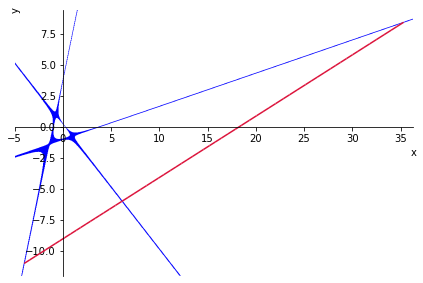

In [25]:
p1 = plot_implicit(eq,x_var=('x', x5-1, x6+1), y_var=('y', y5-1,y6+1),show=False)
p2 = plot(eq2, ('x', -4, x6), line_color='crimson',show=False)
p1.append(p2[0])
p1.show()

# This is the solution! Now we have to get a, b, c
Now x and y are both positive!

In [26]:
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036
a = x6*c
b = y6*c
a,b,c

In [27]:
# Check: 
a/(b+c)+b/(c+a)+c/(a+b)

**Remark:** Both denominators for x and y are equal, so it is easy to get c directly. If the denominators of $x = \frac{x_6}{c_1}$ and $y= \frac{y_6}{c_2}$ were different, you would need the least common multiplier:   
With Euclid's algorithm you would get the greatest common divisor gcd to construct the least common multiplier c and use: $c_1=gcd(c_1,c_2)*n_1$ and $c_2=gcd(c_1,c_2)*n_2$ to get
$$\begin{align}
x &= x_5*n_2\\
y &= y_5*n_1\\
c &= gcd(c_1,c_2)*n_1*n_2
\end{align}$$

In [28]:
def euclid(a,b):
    if b>a: a,b = b,a
    while b>0:
        r = a%b
        a,b = b,r
    return a

In [29]:
x6,y6

In [30]:
# Sympy extracts nominator via x.p and denominator via x.q
c1 = x6.q
c2 = y6.q
gcd = euclid(c1,c2)
n1 = c1//gcd
n2 = c2//gcd
a = x6.p*n2
b = y6.p*n1
c = c1*n2
print(f"a = {a}\nb = {b}\nc = {c}")

a = 154476802108746166441951315019919837485664325669565431700026634898253202035277999
b = 36875131794129999827197811565225474825492979968971970996283137471637224634055579
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036
